In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,848 cases (7 day average) as of Thu 29 Apr, -20.4 since Wed 28 Apr
107 hospitalised (7 day average) as of Wed 28 Apr, +0.0 since Wed 28 Apr
10 died (7 day average) as of Thu 29 Apr, -1.4 since Tue 27 Apr


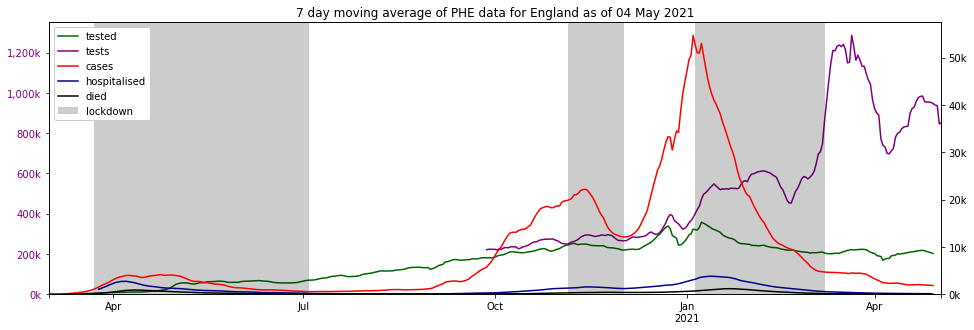

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

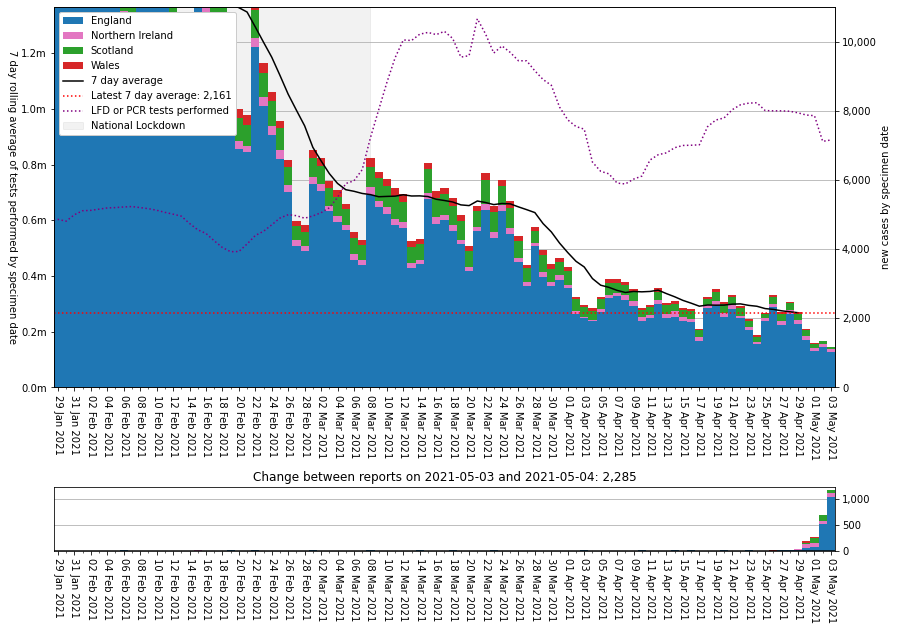

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

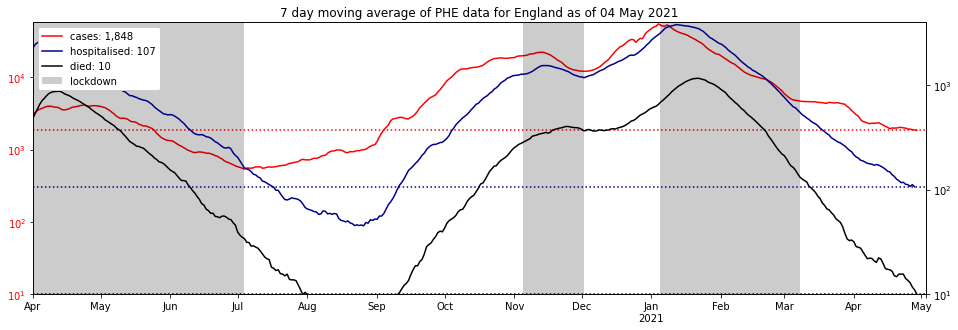

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

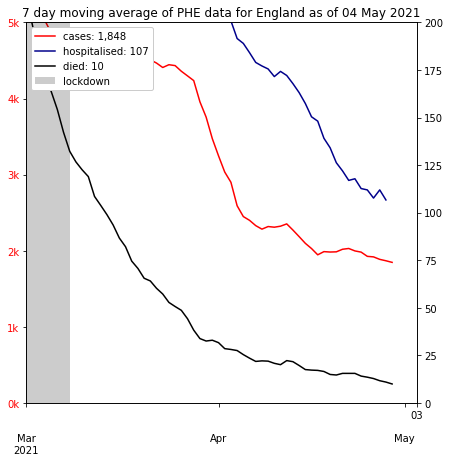

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,03 May 21,"+13,072,543","+29,025,049","+13,072,543","+99,785","+59,113","+99,785"
Northern Ireland,03 May 21,"+436,887","+944,694","+436,887","+5,014","+1,672","+5,014"
Scotland,03 May 21,"+1,348,050","+2,833,761","+1,348,050","+21,451","+8,806","+21,451"
Wales,03 May 21,"+772,527","+1,864,400","+772,527","+2,808","+9,713","+2,808"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,13072543.0,29025049.0,15952506.0,56286961,23.224816,28.341388,48.433796
1,Northern Ireland,N92000002,436887.0,944694.0,507807.0,1893667,23.070952,26.816066,50.112982
2,Scotland,S92000003,1348050.0,2833761.0,1485711.0,5463300,24.674647,27.194388,48.130965
3,Wales,W92000004,772527.0,1864400.0,1091873.0,3152879,24.502272,34.630983,40.866744


'partial: 34,667,904 (51.9%), full: 15,630,007'

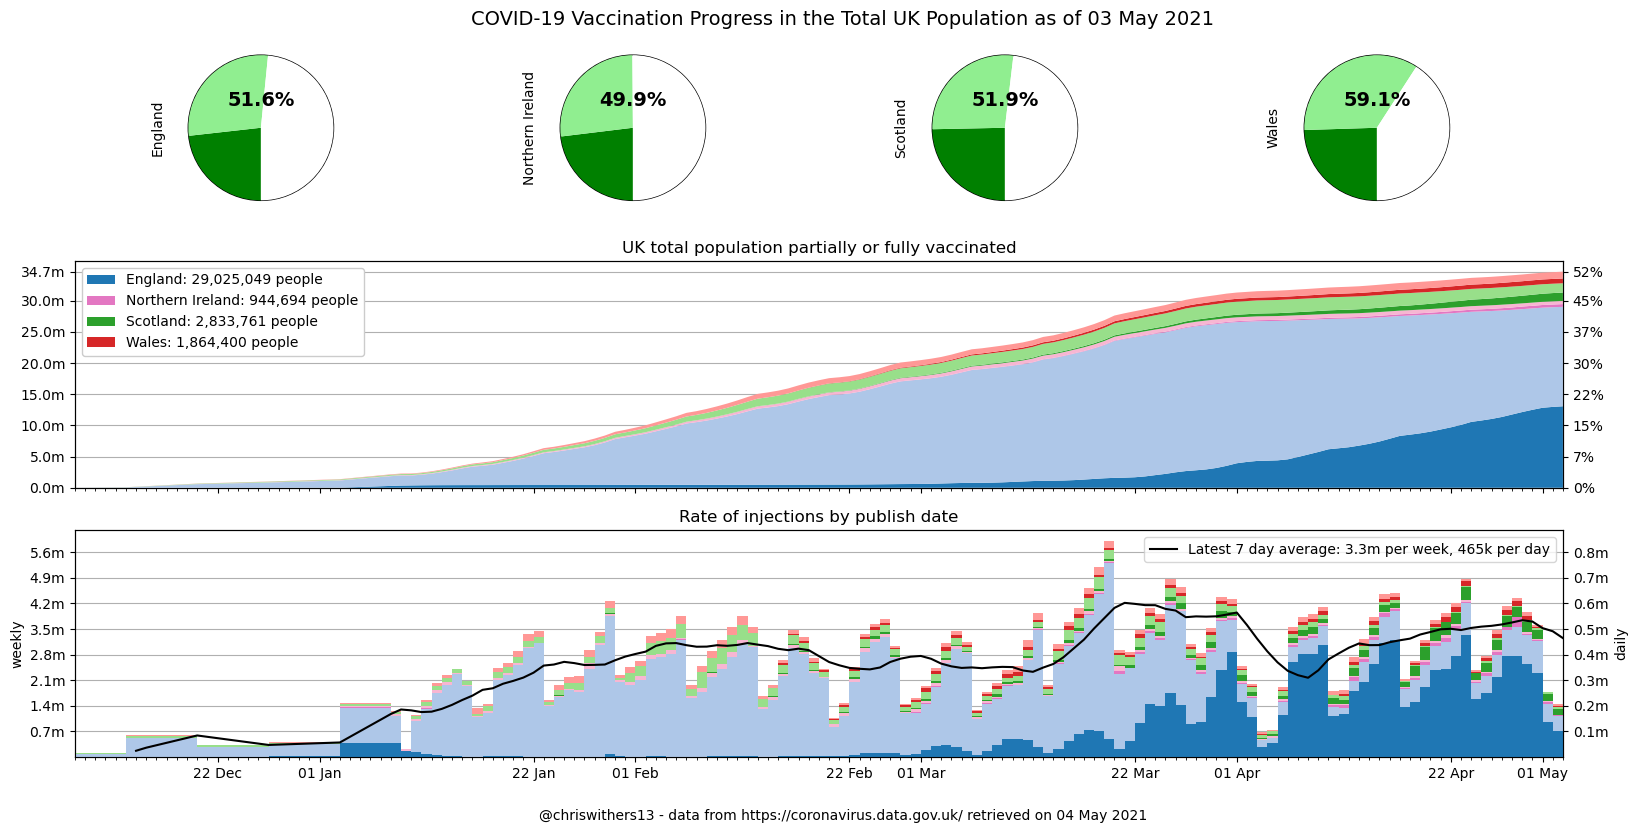

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

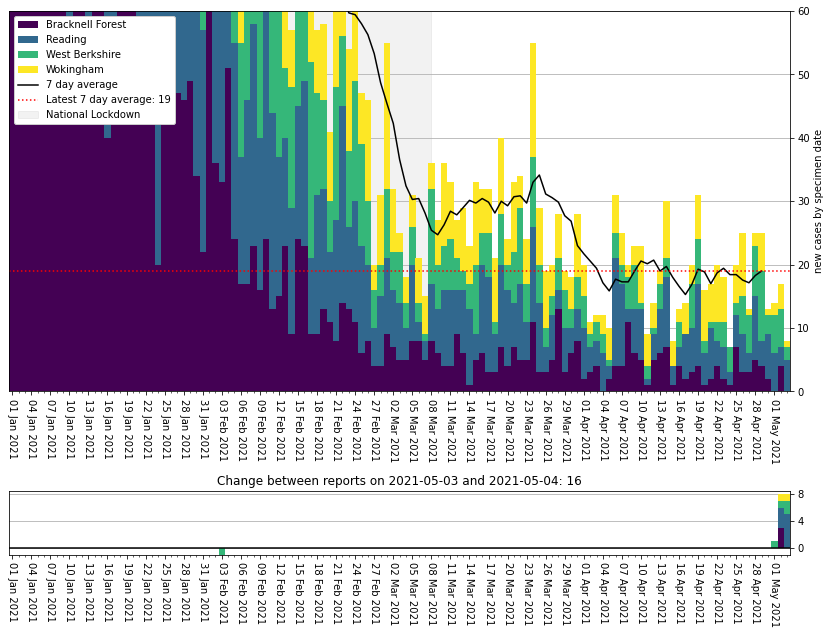

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

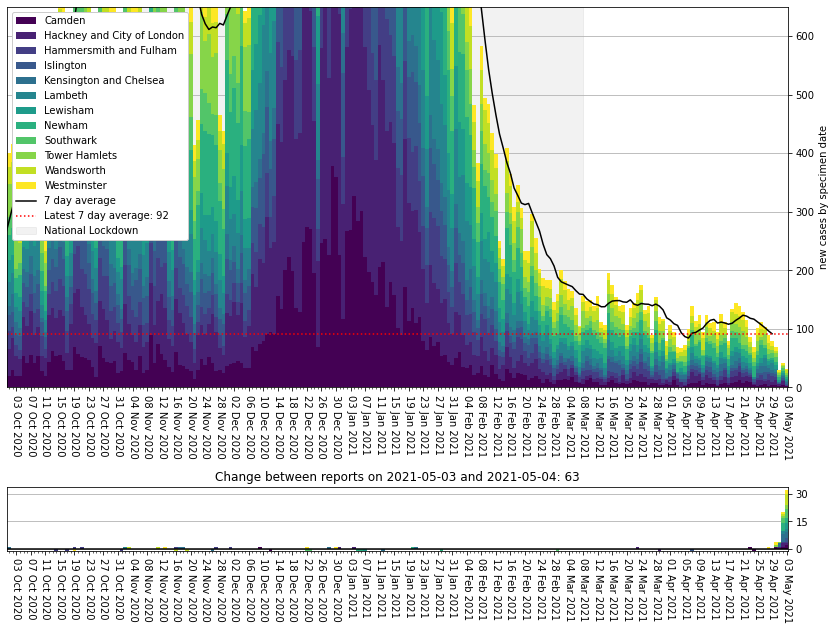

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000120,Hyndburn,107.350419,87.0,2021-05-03
N09000005,Derry City and Strabane,102.456307,155.0,2021-05-03
E07000036,Erewash,80.609512,93.0,2021-05-03
E08000001,Bolton,78.942793,227.0,2021-05-03
S12000020,Moray,67.835525,65.0,2021-05-03
E08000016,Barnsley,56.710928,140.0,2021-05-03
E08000017,Doncaster,50.338260,157.0,2021-05-03
E07000169,Selby,48.554403,44.0,2021-05-03
E08000034,Kirklees,48.432537,213.0,2021-05-03


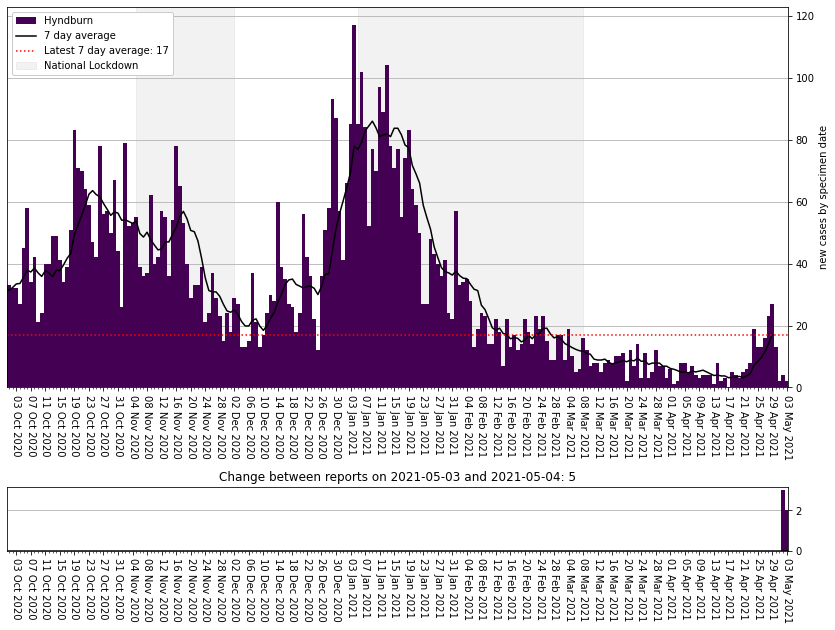

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,38.202635,303.0,2021-05-03
E08000019,Sheffield,41.548902,243.0,2021-05-03
E08000032,Bradford,43.536578,235.0,2021-05-03
E08000001,Bolton,78.942793,227.0,2021-05-03
E08000034,Kirklees,48.432537,213.0,2021-05-03
E08000003,Manchester,30.206672,167.0,2021-05-03
E08000036,Wakefield,47.658421,166.0,2021-05-03
E08000017,Doncaster,50.338260,157.0,2021-05-03
N09000005,Derry City and Strabane,102.456307,155.0,2021-05-03


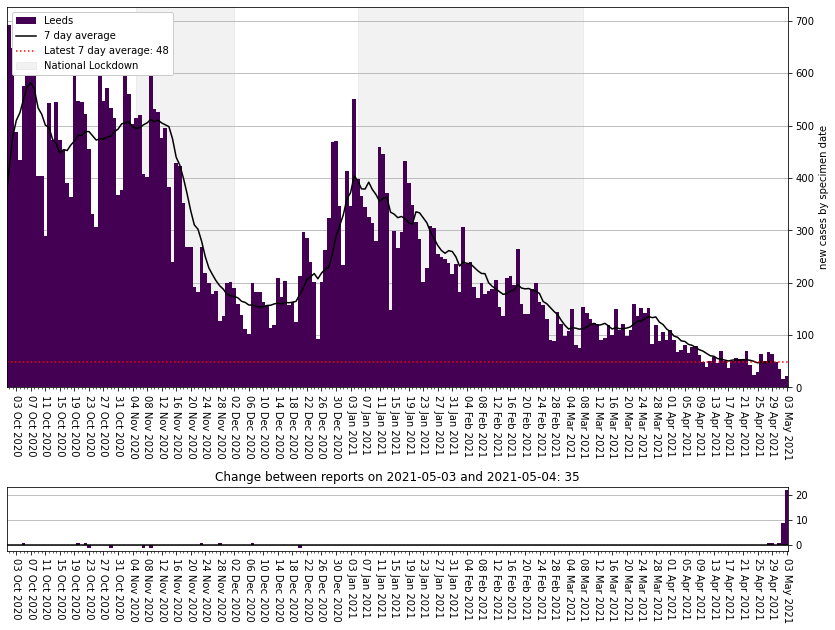

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.15

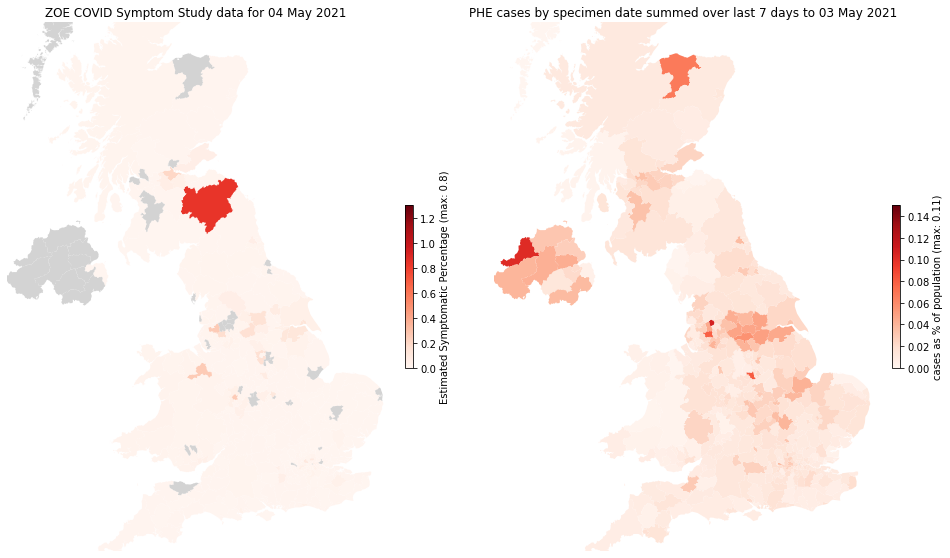

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...